<a href="https://colab.research.google.com/github/Taekil/TensorFLowStudyNote/blob/master/ex_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf  # Import the TensorFlow library
from tensorflow.keras.datasets.mnist import load_data  # Import the MNIST module from the TensorFlow Keras library
from tensorflow.keras.models import Sequential  # Import the Sequential class from the models module of Keras
# Sequential is a way to create network models in a sequential layer-by-layer fashion
from tensorflow.keras import models  # Import the models module from the Keras library
from tensorflow.keras.layers import Dense, Input, Flatten
# Dense: Fully connected layer
# Input: Define the input layer
# Flatten: Flatten the input data
from tensorflow.keras.utils import to_categorical, plot_model
# to_categorical: Perform one-hot encoding of class labels
# plot_model: Visualize the architecture of a Keras model

from sklearn.model_selection import train_test_split  # Import the train_test_split function from scikit-learn
# train_test_split: This function is often used for splitting a dataset into
# training and testing sets when working with machine learning models.
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')  # Set the style of Matplotlib to seaborn-white


<ipython-input-32-03dab9995f76>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')  # Set the style of Matplotlib to seaborn-white


In [33]:
# this line sets the random seed for TensorFlow to 111.
tf.random.set_seed(111)

# loading MNIST dataset using the load_data
# the dataset is split into two parts
(x_train_full, y_train_full), (x_test, y_test) = load_data(path='mnist.npz')
# full: full training dataset including features and labels
# test: test dataset
# when loading data, split in test usage and train usage
# train test split -> test_size=0.3, 30% of input using as test

# This line performs a train validation split on the full training dataset
# train_test_split: a function from scikit-learn spliting a dataset into two parts
# one for training and the other for validation
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

# test size specifies the 30% of the data should be used for validation
# random sead for splitting process ensuring reproducibility

In [34]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])

print("train data: {} label: {}".format(x_train_full.shape, y_train_full.shape))
# total data: 60000
print("train data: {} label: {}".format(x_train.shape, y_train.shape))
#
print("validation data: {} label: {}".format(x_val.shape, y_val.shape))
# 30% of data is validation data
print("test data: {} label: {}".format(x_test.shape, y_test.shape))



train data: (60000, 28, 28) label: (60000,)
train data: (42000, 28, 28) label: (42000,)
validation data: (18000, 28, 28) label: (18000,)
test data: (10000, 28, 28) label: (10000,)


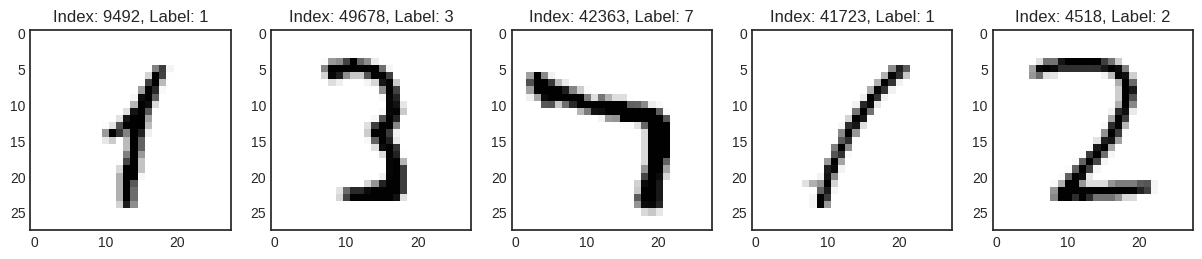

In [35]:
num_sample = 5
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15,3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(img)
  plt.title('Index: {}, Label: {}'.format(idx, label))

In [36]:
 # normalization
 # max value is 255
 # between 0 to 1 by dividing by 255
 x_train = x_train / 255.
 x_val = x_val / 255.
 x_test = x_test / 255.

 y_train = to_categorical(y_train)
 y_val = to_categorical(y_val)
 y_test = to_categorical(y_test)

In [37]:
model = Sequential([Input(shape=(28, 28), name='input'),
                    Flatten(input_shape=[28, 28], name='flatten'),
                    Dense(100, activation='relu', name='Dense1'),
                    Dense(64, activation='relu', name='Dense2'),
                    Dense(32, activation='relu', name='Dense3'),
                    Dense(10, activation='softmax', name='output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 100)               78500     
                                                                 
 Dense2 (Dense)              (None, 64)                6464      
                                                                 
 Dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


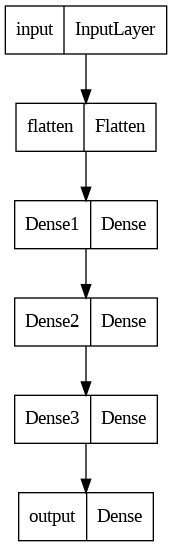

In [38]:
plot_model(model)

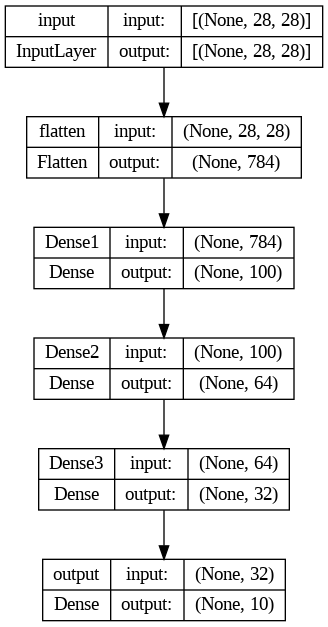

In [39]:
plot_model(model, show_shapes=True)

# MOMDEL COMPILE and TRAINING

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [42]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 3s 5ms/step - loss: 1.6629 - accuracy: 0.5171 - val_loss: 0.9202 - val_accuracy: 0.7740
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.6602 - accuracy: 0.8261 - val_loss: 0.5236 - val_accuracy: 0.8511
Epoch 3/50
329/329 [==============================] - 1s 5ms/step - loss: 0.4574 - accuracy: 0.8720 - val_loss: 0.4136 - val_accuracy: 0.8814
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3834 - accuracy: 0.8904 - val_loss: 0.3699 - val_accuracy: 0.8931
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3432 - accuracy: 0.9014 - val_loss: 0.3331 - val_accuracy: 0.9016
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3161 - accuracy: 0.9085 - val_loss: 0.3217 - val_accuracy: 0.9047
Epoch 7/50
329/329 [==============================] - 2s 7ms/step - loss: 0.2957 - accuracy: 0.9145 - val_loss: 0.3166 - val_accuracy: 0.9074
Epoch 

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

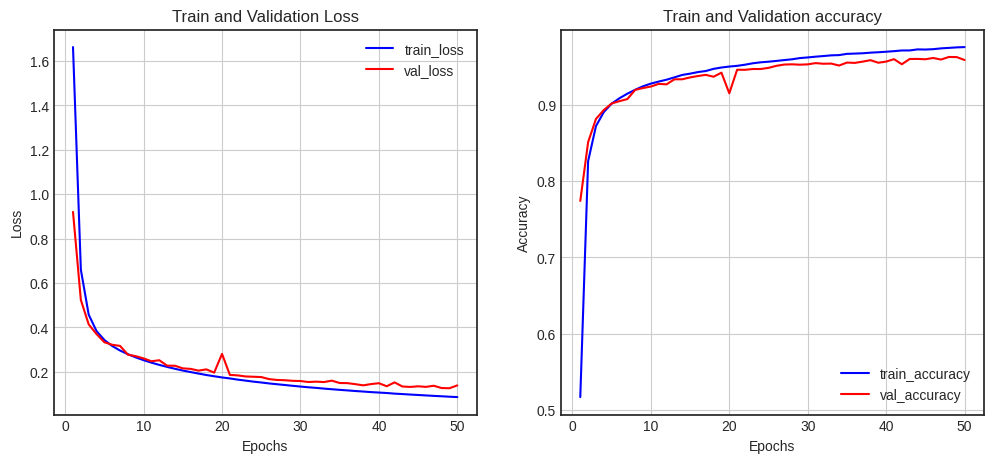

In [45]:
history_dict=history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()


# MODEL EVALUATION AND PREDCITION

In [48]:
 model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1319 - accuracy: 0.9590


[0.13187792897224426, 0.9589999914169312]

In [49]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=7)
print(pred_ys[0])


313/313 [==============================] - 1s 2ms/step
(10000, 10)
[1.0818118e-06 9.9515326e-08 2.6809939e-05 9.1834772e-05 6.8851840e-08
 5.0145007e-07 2.6328693e-11 9.9984097e-01 3.5970180e-07 3.8250790e-05]


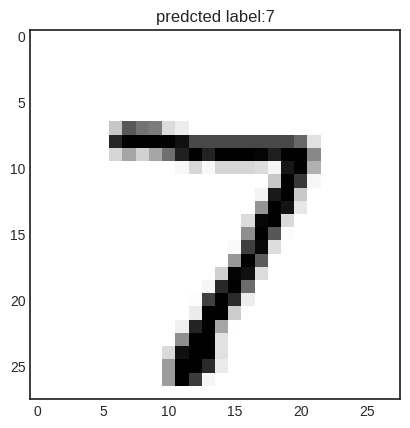

In [50]:
arg_pred_y = np.argmax(pred_ys, axis=1)

# previous section, 7th possibility is max, so the predict number is 7.

plt.imshow(x_test[0])
plt.title('predcted label:{}'.format(arg_pred_y[0]))
plt.show()


# CONFUSION MATRIX

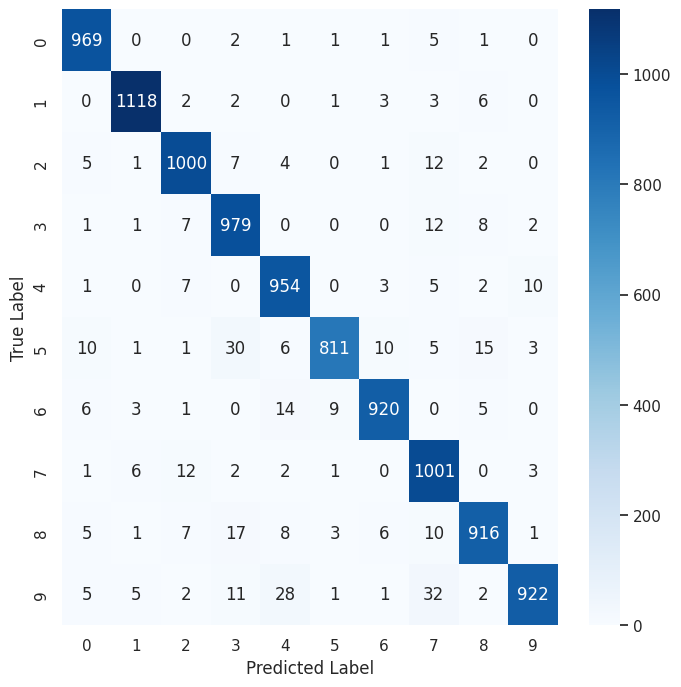

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8,8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- This is the matrix to show the result,
- the Blue-highlighted number '969' at 1st row:
  - answer 0 when given is 0.